# Data Preparation

In [1]:
# import libraries

import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# import data

df = pd.read_csv("med_appt_raw.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# check the shape of dataframe

df.shape

(110527, 14)

In [4]:
# check if there is missing values

df.isna().sum()

# there is no missing value in this data

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
# feature description

feat = ["Patient identification number",
          "Appointment number",
          "Patient's sex",
          "Time when patient scheduled the appt.",
          "Actual appointment time",
          "Patient's Age",
          "Patient's house neighborhood",
          "Status of holding Bolsa Familia program",
          "Status of having hypertension",
          "Status of having diabetes",
          "Status of being alcoholic",
          "Hitch/disability to attend appointment",
          "SMS reminder sent to patient",
          "The absence of patient without prior notification"]
feature = pd.DataFrame(feat, columns=['Feature Desc.'])

In [6]:
# data description
desc = []
for i in df.columns:
    desc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum())/len(df)*100,2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

df_desc = pd.DataFrame(desc, columns=['Feature Name', 'DataType', 'NaN', '%Nan', 'Unique', 'Sample'])
df_desc = pd.concat([feature, df_desc], axis=1)
df_desc

# PatientId should be integer, not float (need to change data type)
# ScheduleDay and AppointmentDay should be in datetime format, not object (need to change data type)
# Hipertension should be hypertension, handcap should be handycap (need to correct feature name)

,Feature Desc.,Feature Name,DataType,NaN,%Nan,Unique,Sample
0,Patient identification number,PatientId,float64,0,0.0,62299,"[73318661561666.0, 454287126844.0]"
1,Appointment number,AppointmentID,int64,0,0.0,110527,"[5686311, 5526096]"
2,Patient's sex,Gender,object,0,0.0,2,"[M, F]"
3,Time when patient scheduled the appt.,ScheduledDay,object,0,0.0,103549,"[2016-04-15T09:43:16Z, 2016-06-02T10:59:06Z]"
4,Actual appointment time,AppointmentDay,object,0,0.0,27,"[2016-05-13T00:00:00Z, 2016-06-07T00:00:00Z]"
5,Patient's Age,Age,int64,0,0.0,104,"[3, 88]"
6,Patient's house neighborhood,Neighbourhood,object,0,0.0,81,"[DO QUADRO, PARQUE MOSCOSO]"
7,Status of holding Bolsa Familia program,Scholarship,int64,0,0.0,2,"[1, 0]"
8,Status of having hypertension,Hipertension,int64,0,0.0,2,"[0, 1]"
9,Status of having diabetes,Diabetes,int64,0,0.0,2,"[1, 0]"


In [7]:
# datatype fixing

df['PatientId'] = df['PatientId'].astype('int')
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int64              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [8]:
# correcting feature name
df.rename(columns= {'Hipertension':'hypertension', 'Handcap':'handicap'},
          inplace= True) 

# rename other features to simplify
df.rename(columns= {'PatientId': 'patientID', 'AppointmentID': 'apptID', 'Gender': 'gender',
                   'ScheduledDay': 'sched_date', 'AppointmentDay': 'appt_date', 'Age': 'age',
                   'Neighbourhood': 'neighborhood', 'Scholarship': 'scholarship', 'Diabetes': 'diabetes',
                   'Alcoholism': 'alcoholism', 'SMS_received': 'sms_received', 'No-show': 'noshow'},
         inplace=True)

In [9]:
df.head()

,patientID,apptID,gender,sched_date,appt_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Data Wrangling

## Schedule Date and Appointment Date 

In [10]:
# check appointment date first
df['appt_date'].unique()

# We recognize that appt_date has all data timestamps of 00:00:00:00:00
# Means the feature only show appointment date (without exact time)
# We can remove timestamp on appt_date data to simplify

<DatetimeArray>
['2016-04-29 00:00:00+00:00', '2016-05-03 00:00:00+00:00',
 '2016-05-10 00:00:00+00:00', '2016-05-17 00:00:00+00:00',
 '2016-05-24 00:00:00+00:00', '2016-05-31 00:00:00+00:00',
 '2016-05-02 00:00:00+00:00', '2016-05-30 00:00:00+00:00',
 '2016-05-16 00:00:00+00:00', '2016-05-04 00:00:00+00:00',
 '2016-05-19 00:00:00+00:00', '2016-05-12 00:00:00+00:00',
 '2016-05-06 00:00:00+00:00', '2016-05-20 00:00:00+00:00',
 '2016-05-05 00:00:00+00:00', '2016-05-13 00:00:00+00:00',
 '2016-05-09 00:00:00+00:00', '2016-05-25 00:00:00+00:00',
 '2016-05-11 00:00:00+00:00', '2016-05-18 00:00:00+00:00',
 '2016-05-14 00:00:00+00:00', '2016-06-02 00:00:00+00:00',
 '2016-06-03 00:00:00+00:00', '2016-06-06 00:00:00+00:00',
 '2016-06-07 00:00:00+00:00', '2016-06-01 00:00:00+00:00',
 '2016-06-08 00:00:00+00:00']
Length: 27, dtype: datetime64[ns, UTC]

In [11]:
# remove timestamps
df['appt_date'] = df['appt_date'].dt.date
df['appt_date'] = pd.to_datetime(df['appt_date'])
df.head()

,patientID,apptID,gender,sched_date,appt_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# as we remove timestamp from appt_date, we also need to delete timestamp from sched_date to make the data comparable
df['sched_date'] = df['sched_date'].dt.date
df['sched_date'] = pd.to_datetime(df['sched_date'])
df.head()

,patientID,apptID,gender,sched_date,appt_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   patientID     110527 non-null  int64         
 1   apptID        110527 non-null  int64         
 2   gender        110527 non-null  object        
 3   sched_date    110527 non-null  datetime64[ns]
 4   appt_date     110527 non-null  datetime64[ns]
 5   age           110527 non-null  int64         
 6   neighborhood  110527 non-null  object        
 7   scholarship   110527 non-null  int64         
 8   hypertension  110527 non-null  int64         
 9   diabetes      110527 non-null  int64         
 10  alcoholism    110527 non-null  int64         
 11  handicap      110527 non-null  int64         
 12  sms_received  110527 non-null  int64         
 13  noshow        110527 non-null  object        
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [14]:
# checking the number of unique value in sched_date and appt_date
print(df['sched_date'].nunique())
print(df['appt_date'].nunique())

111
27


In [15]:
# ideally, schedule date should be before the appointment date
# let us check if there is data where appointment date is before scheduled date
df[df['appt_date']<df['sched_date']]

# there are 5 data where appointment date is before scheduled date (0.004% from population, and 0.022% from no-show patients)
# because the number is very small, we can drop these data

,patientID,apptID,gender,sched_date,appt_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow
27033,7839272661752,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7896293967868,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,24252258389979,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,998231581612122,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3787481966821,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


In [16]:
# drop data where appointment time is before scheduled time
df = df[df['appt_date'] >= df['sched_date']]

In [17]:
# lets see the range of sched_date and appt_date
print(f"Scheduled date range: {df['sched_date'].min()} - {df['sched_date'].max()}")
print(f"Appointment date range: {df['appt_date'].min()} - {df['appt_date'].max()}")

# Scheduled date range from November 2015 until June 2016; Appointment date range from April 2016 to June 2006
# It looks unusual: patient comes 5 months after the scheduled date (is it tolerable or outlier?)

Scheduled date range: 2015-11-10 00:00:00 - 2016-06-08 00:00:00
Appointment date range: 2016-04-29 00:00:00 - 2016-06-08 00:00:00


## Waiting Time

In [18]:
# to see if 5 months delay is tolerable, we can find it through calculating time difference
# time difference between sched_date and appt_date (waiting time)
df['waiting'] = df['appt_date']-df['sched_date']
df['waiting'] = df['waiting'].dt.days
df.sample(5)

,patientID,apptID,gender,sched_date,appt_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow,waiting
9658,7831327189595,5527183,M,2016-03-30,2016-05-04,48,ROMÃO,0,0,0,0,0,1,Yes,35
101837,3543195151864,5755057,M,2016-06-01,2016-06-01,8,ILHA DE SANTA MARIA,0,0,0,0,0,0,No,0
84608,496891744474147,5758409,F,2016-06-01,2016-06-06,63,JARDIM CAMBURI,0,0,0,0,0,0,Yes,5
4187,89331462286216,5713421,F,2016-05-18,2016-05-24,58,SANTO ANTÔNIO,0,0,0,0,0,1,No,6
103182,794341588623344,5741753,M,2016-05-30,2016-06-02,19,JARDIM DA PENHA,0,0,0,0,0,1,Yes,3


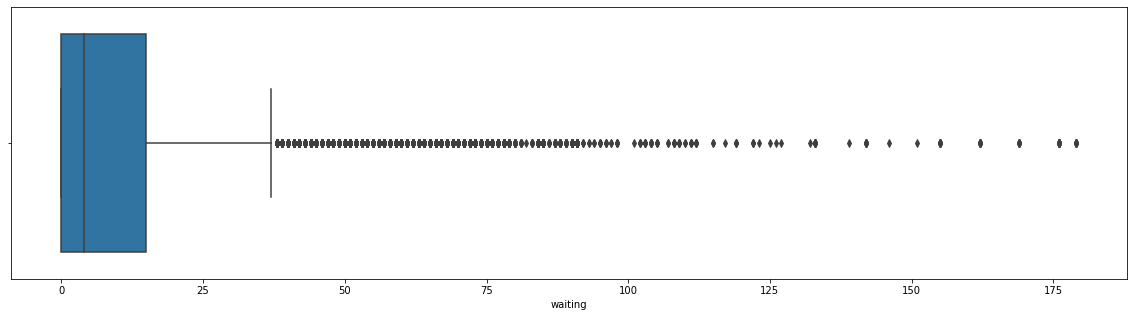

In [19]:
# boxplot of waiting time
plt.figure(figsize=(20,5))
sns.boxplot(df['waiting'])
plt.show()

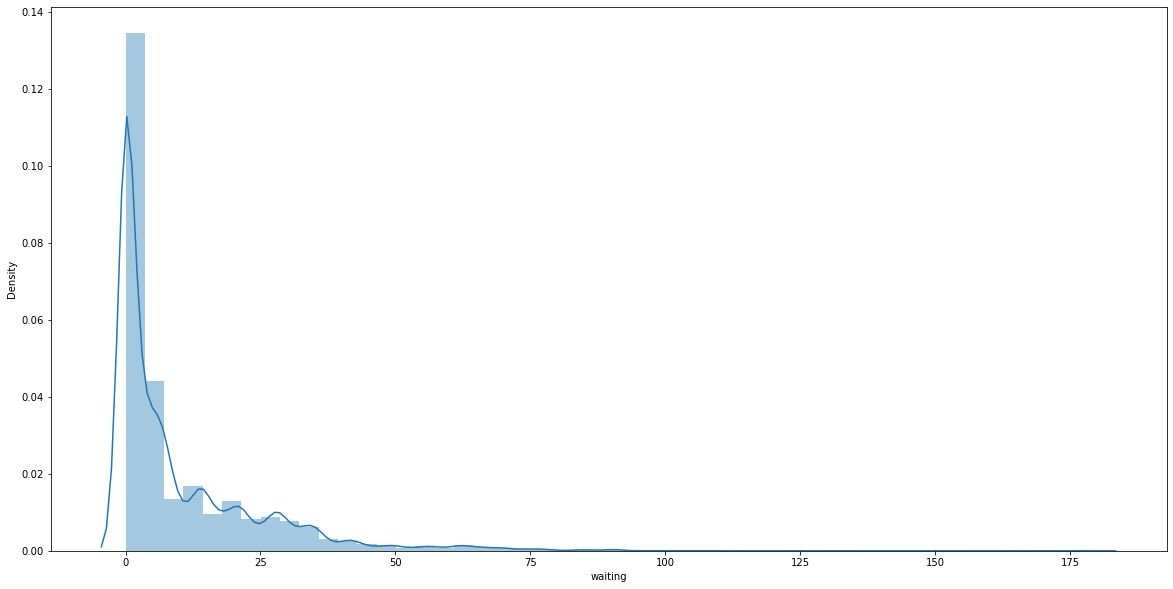

There are 90.61% of total patients scheduled appointments within 30 days


In [20]:
# see the distribution of waiting time
plt.figure(figsize=(20,10))
sns.distplot(df['waiting'])
plt.show()

# see how many patients who schedule appointment in 30 days 
print(f"There are {round(len(df[df['waiting']<=30])/len(df)*100, 3)}% of total patients scheduled appointments within 30 days")

# most appointments are booked in the same day as schedule date (waiting = 0), but the variance of the waiting time is very big
# we need to narrow the observation data by dropping outliers, so that the analysis will be less biased

In [21]:
# see statistic description of feature
df['waiting'].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting, dtype: float64

In [22]:
# people tend to repeat their schedule monthly (ex: gaining salary, household shopping, office meeting, etc.)
# according from data above, approximately 90% people schedule medical appointment within 30 days
# so, we can cut the waiting time only for a month (30 days), based on people's monthly routine tendency and the frequency of data within 30 days range.

# drop data where waiting time is more than 30 days
df = df[df['waiting']<=30]

## Age

In [23]:
# see statistical description of age
df['age'].describe()

# we notice that the minimum value is -1, which does not make sense because age should never be negative
# we need to see the data with negative value of age and remove them

count    100144.000000
mean         36.978840
std          23.055292
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [24]:
# remove negative age
df = df[df['age']>=0]
df.sample(5)

,patientID,apptID,gender,sched_date,appt_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow,waiting
47577,2835221561764,5703553,F,2016-05-16,2016-05-16,70,SANTA CECÍLIA,0,1,0,0,0,0,No,0
4199,92156372542569,5652619,M,2016-05-03,2016-05-05,69,NOVA PALESTINA,0,1,0,1,0,0,No,2
45299,22699821567486,5612088,F,2016-04-25,2016-05-04,62,SANTO ANTÔNIO,0,1,0,0,0,1,No,9
100690,443998471828382,5755253,F,2016-06-01,2016-06-07,22,REDENÇÃO,0,0,0,0,0,1,No,6
61896,46293934724,5720158,F,2016-05-19,2016-05-19,80,SOLON BORGES,0,0,0,0,0,0,No,0


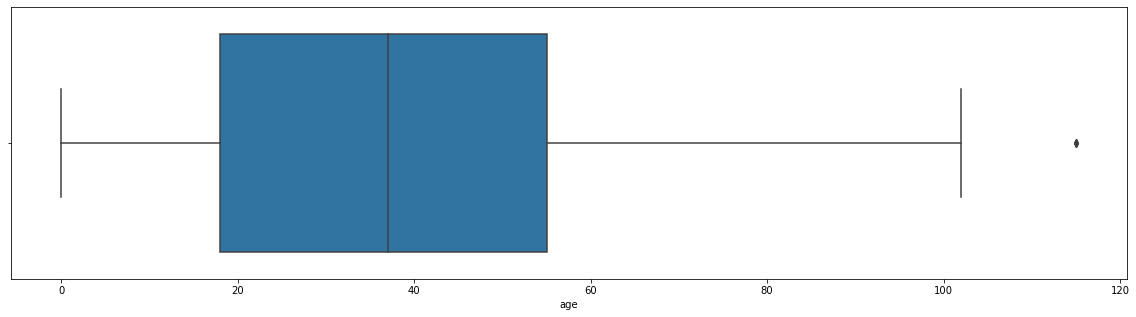

In [25]:
# boxplot of age
plt.figure(figsize=(20,5))
sns.boxplot(df['age'])
plt.show()

In [26]:
# then, we have age 0
# we would like to ensure that 0 is not a missing value, but it is infants who have not reach 1 year old
# to check it, we can assume that infants do not drink alcohol and do not have hypertension nor diabetes
df[(df['age']==0) & (df['hypertension']==1) & (df['diabetes']==1) & (df['alcoholism']==1)]

# 0 data means there is no patient with age 0 who has those kind of health issue
# confirmed: we can assume that they are infants

,patientID,apptID,gender,sched_date,appt_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow,waiting


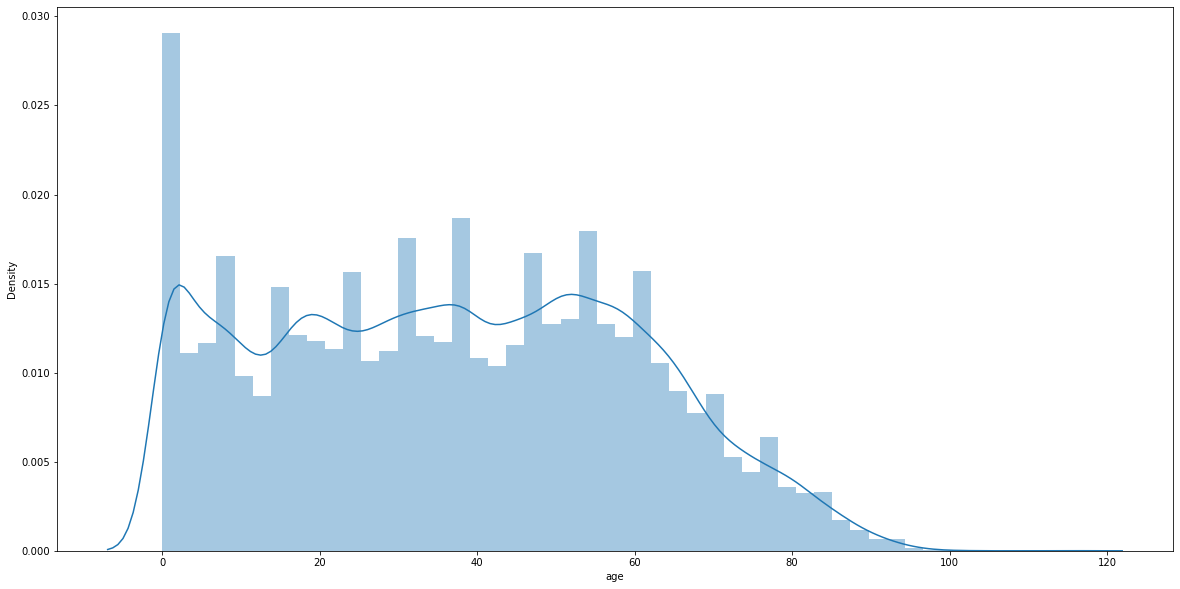

There are 95.165% of total patients are below 75 years old.


In [27]:
# data distribution of age
plt.figure(figsize=(20,10))
sns.distplot(df['age'])
plt.show()

# see how many patients who is younger than 75 years old (Brazil's life expectancy, 2017)
print(f"There are {round(len(df[df['age']<=75])/len(df)*100, 3)}% of total patients are below 75 years old.")

In [28]:
# life expectancy of Brazilian is 75 years (worldbank.org)
# our data shows that approximately 95% of our patients are below 75 years
# we manage to delete the outliers by having this information, to narrow the observation

# drop data where age is more than 75
df = df[df['age']<=75]

## Neighborhood

In [29]:
# see the number of patient based on neighborhood
df['neighborhood'].value_counts()

JARDIM CAMBURI                 5391
MARIA ORTIZ                    4238
RESISTÊNCIA                    3560
JARDIM DA PENHA                3538
ITARARÉ                        3040
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                     9
AEROPORTO                         7
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighborhood, Length: 81, dtype: int64

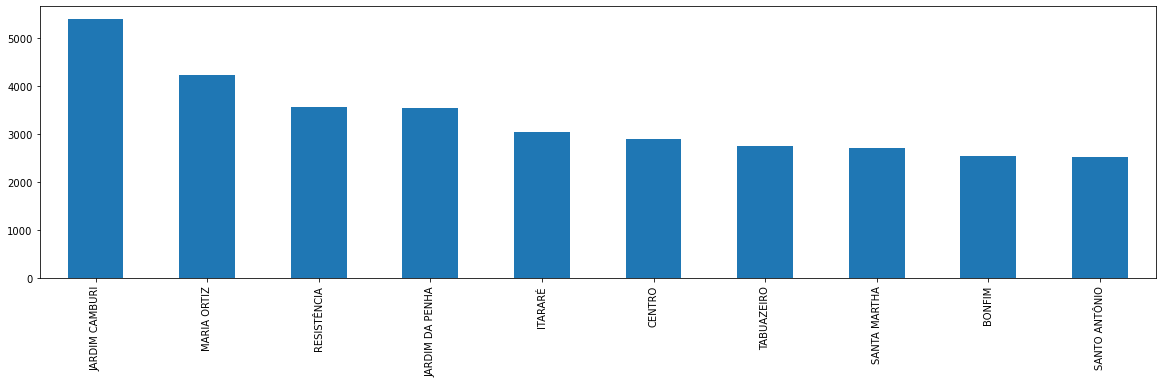

In [30]:
# neighborhoods with most patients
plt.figure(figsize=(20,5))
df['neighborhood'].value_counts()[:10].plot(kind="bar")
plt.show()

## Adding Day of Week 

In [31]:
# people's activity is mostly affected by the day of week, for example: people work on monday-friday and go to vacation on saturday-sunday
# adding day of week may be useful to future analysis of no-show behavior
# in day, 0 is monday and 6 is sunday
df['sched_day'] = df['sched_date'].dt.dayofweek
df['appt_day'] = df['appt_date'].dt.dayofweek
df.sample(5)

,patientID,apptID,gender,sched_date,appt_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow,waiting,sched_day,appt_day
78037,4976512313825,5750877,F,2016-05-31,2016-05-31,49,JOANA D´ARC,0,0,0,0,0,0,No,0,1,1
51099,72416125978946,5658868,F,2016-05-04,2016-05-11,16,ROMÃO,0,0,0,0,0,1,No,7,2,2
20341,448796212579,5700506,F,2016-05-16,2016-05-20,30,SÃO JOSÉ,0,0,0,0,0,0,No,4,0,4
73712,14338683758686,5702734,M,2016-05-16,2016-05-17,10,SANTO ANDRÉ,0,0,0,0,0,0,No,1,0,1
42963,7678979152317,5723645,M,2016-05-20,2016-05-20,2,ROMÃO,0,0,0,0,0,0,No,0,4,4


In [32]:
# creating weekday feature to examine if weekday/weekend affect the no-show behavior
# weekday = 1, weekend = 0
df['sched_weekday'] = df['sched_day'].map({0:1, 1:1, 2:1, 3:1, 4:1, 5:0, 6:0})
df['appt_weekday'] = df['appt_day'].map({0:1, 1:1, 2:1, 3:1, 4:1, 5:0, 6:0})
df.sample(5)

,patientID,apptID,gender,sched_date,appt_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow,waiting,sched_day,appt_day,sched_weekday,appt_weekday
59462,962429973452186,5743392,M,2016-05-30,2016-05-30,0,REDENÇÃO,0,0,0,0,0,0,No,0,0,0,1,1
105819,46468677753624,5741644,F,2016-05-30,2016-06-02,32,SÃO PEDRO,0,0,0,0,0,1,No,3,0,3,1,1
74756,773988391879781,5715125,F,2016-05-18,2016-05-20,46,JARDIM CAMBURI,0,0,0,0,0,0,No,2,2,4,1,1
69659,797656157448,5693660,M,2016-05-13,2016-05-13,8,SANTA LÚCIA,0,0,0,0,0,0,No,0,4,4,1,1
79631,444549512127737,5728685,M,2016-05-20,2016-05-20,37,TABUAZEIRO,0,0,0,0,0,0,Yes,0,4,4,1,1


## Adding Weather data

In [33]:
# sometimes, weather can affect the mood of a person for going outside
# the effect of weather may appear as the factoor of medical appointment no-show
# we need to check the effect by adding weather to the dataset
# weather is added based on appointment day, so we need to check appointment date first
print(f"There are {df['appt_date'].nunique()} unique values.")
df['appt_date'].unique()

There are 27 unique values.


array(['2016-04-29T00:00:00.000000000', '2016-05-17T00:00:00.000000000',
       '2016-05-24T00:00:00.000000000', '2016-05-31T00:00:00.000000000',
       '2016-05-03T00:00:00.000000000', '2016-05-10T00:00:00.000000000',
       '2016-05-02T00:00:00.000000000', '2016-05-30T00:00:00.000000000',
       '2016-05-16T00:00:00.000000000', '2016-05-04T00:00:00.000000000',
       '2016-05-19T00:00:00.000000000', '2016-05-12T00:00:00.000000000',
       '2016-05-06T00:00:00.000000000', '2016-05-20T00:00:00.000000000',
       '2016-05-05T00:00:00.000000000', '2016-05-13T00:00:00.000000000',
       '2016-05-09T00:00:00.000000000', '2016-05-25T00:00:00.000000000',
       '2016-05-11T00:00:00.000000000', '2016-05-18T00:00:00.000000000',
       '2016-05-14T00:00:00.000000000', '2016-06-02T00:00:00.000000000',
       '2016-06-03T00:00:00.000000000', '2016-06-06T00:00:00.000000000',
       '2016-06-07T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2016-06-08T00:00:00.000000000'], dtype='dat

In [34]:
# weather is scrapped from https://www.timeanddate.com/
# this way is taken because free member of openweathermap.org can only see historical wheather up to 5 days before today
df['weather'] = df['appt_date'].map({datetime.date(2016, 4, 29): 'cloudy', 
                                     datetime.date(2016, 5, 2): 'sunny',
                                     datetime.date(2016, 5, 3): 'sunny',
                                     datetime.date(2016, 5, 4): 'sunny',
                                     datetime.date(2016, 5, 5): 'sunny',
                                     datetime.date(2016, 5, 6): 'sunny',
                                     datetime.date(2016, 5, 9): 'sunny',
                                     datetime.date(2016, 5, 10): 'sunny',
                                     datetime.date(2016, 5, 11): 'sunny',
                                     datetime.date(2016, 5, 12): 'sunny',
                                     datetime.date(2016, 5, 13): 'sunny',
                                     datetime.date(2016, 5, 14): 'cloudy',
                                     datetime.date(2016, 5, 16): 'sunny',
                                     datetime.date(2016, 5, 17): 'partly sunny',
                                     datetime.date(2016, 5, 18): 'sunny',
                                     datetime.date(2016, 5, 19): 'sunny',
                                     datetime.date(2016, 5, 20): 'sunny',
                                     datetime.date(2016, 5, 24): 'cloudy',
                                     datetime.date(2016, 5, 25): 'sunny',
                                     datetime.date(2016, 5, 30): 'sunny',
                                     datetime.date(2016, 5, 31): 'sunny',
                                     datetime.date(2016, 6, 1): 'sunny',
                                     datetime.date(2016, 6, 2): 'sunny',
                                     datetime.date(2016, 6, 3): 'sunny',
                                     datetime.date(2016, 6, 6): 'sunny',
                                     datetime.date(2016, 6, 7): 'sunny',
                                     datetime.date(2016, 6, 8): 'sunny'})
df.head()

,patientID,apptID,gender,sched_date,appt_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow,waiting,sched_day,appt_day,sched_weekday,appt_weekday,weather
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,4,4,1,1,cloudy
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,4,4,1,1,cloudy
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,4,4,1,1,cloudy
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,4,4,1,1,cloudy
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,4,4,1,1,cloudy


## Exporting Clean Data

In [35]:
df.to_csv('med_appt_clean.csv', index=False)

In [36]:
pd.read_csv('med_appt_clean.csv').head()

,patientID,apptID,gender,sched_date,appt_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow,waiting,sched_day,appt_day,sched_weekday,appt_weekday,weather
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,4,4,1,1,cloudy
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,4,4,1,1,cloudy
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,4,4,1,1,cloudy
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,4,4,1,1,cloudy
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,4,4,1,1,cloudy


# Data Encoding

In [37]:
# gender encoding
# female = 0, male = 1
df['gender'] = df['gender'].map({'F':0, 'M':1})

In [38]:
# neighborhood encoding

# as category, neighborhood may not have a significant effect on the machine learning
# but, there is a probability that distance between neighborhood and the hospital affect the no-show behavior of patients
# the hospital is located in Vitoria, Brazil -> all neighborhood distance will be counted from Vitoria
# the distance is based on google map (using nearest route)

df['neighborhood'] = df['neighborhood'].map({'JARDIM DA PENHA': 1.8, 
                                             'MATA DA PRAIA': 2.9,
                                             'PONTAL DE CAMBURI': 1.6,
                                             'GOIABEIRAS': 3.7,
                                             'ANDORINHAS': 1.9,
                                             'CONQUISTA': 5.2,
                                             'NOVA PALESTINA': 6.1,
                                             'DA PENHA': 2.3,
                                             'TABUAZEIRO': 3.6,
                                             'BENTO FERREIRA': 2.5,
                                             'SÃO PEDRO': 7.3,
                                             'SANTA MARTHA': 2.7,
                                             'SÃO CRISTÓVÃO': 2.9,
                                             'MARUÍPE': 3.3,
                                             'GRANDE VITÓRIA': 8.4,
                                             'SÃO BENEDITO': 1.9,
                                             'ILHA DAS CAIEIRAS': 6.9,
                                             'SANTO ANDRÉ': 6.8,
                                             'SOLON BORGES': 5.0,
                                             'BONFIM': 2.9,
                                             'JARDIM CAMBURI': 5.8,
                                             'REPÚBLICA': 3.5,
                                             'MARIA ORTIZ': 5.3,
                                             'JABOUR': 5.4,
                                             'ANTÔNIO HONÓRIO': 4.7,
                                             'RESISTÊNCIA': 4.7,
                                             'ILHA DE SANTA MARIA': 3.8,
                                             'JUCUTUQUARA': 3.7,
                                             'MONTE BELO': 3.1,
                                             'MÁRIO CYPRESTE': 8.0,
                                             'SANTO ANTÔNIO': 9.0,
                                             'BELA VISTA': 9.2,
                                             'PRAIA DO SUÁ': 2.2,
                                             'SANTA HELENA': 1.6,
                                             'ITARARÉ': 2.0,
                                             'INHANGUETÁ': 9.8,
                                             'UNIVERSITÁRIO': 9.0,
                                             'REDENÇÃO': 6.5,
                                             'SANTA CLARA': 7.0,
                                             'CENTRO': 6.1,
                                             'PARQUE MOSCOSO': 6.7,
                                             'DO MOSCOSO': 7.0,
                                             'SANTOS DUMONT': 3.2,
                                             'CARATOÍRA': 8.2,
                                             'ARIOVALDO FAVALESSA': 8.8,
                                             'GURIGICA': 1.8,
                                             'JOANA D´ARC': 3.5,
                                             'CONSOLAÇÃO': 2.4,
                                             'PRAIA DO CANTO': 0.5,
                                             'BOA VISTA': 3.8,
                                             'MORADA DE CAMBURI': 3.6,
                                             'SANTA LUÍZA': 1.2,
                                             'SANTA LÚCIA': 0.8,
                                             'BARRO VERMELHO': 1.4,
                                             'ESTRELINHA': 9.7,
                                             'FORTE SÃO JOÃO': 4.5,
                                             'FONTE GRANDE': 6.5,
                                             'ENSEADA DO SUÁ': 3.0,
                                             'SANTOS REIS': 7.5,
                                             'PIEDADE': 6.7,
                                             'SÃO JOSÉ': 7.2,
                                             'JESUS DE NAZARETH': 2.9,
                                             'SANTA TEREZA': 8.4,
                                             'CRUZAMENTO': 3.9,
                                             'ILHA DO PRÍNCIPE': 7.6,
                                             'ROMÃO': 4.6,
                                             'COMDUSA': 7.8,
                                             'SANTA CECÍLIA': 4.0,
                                             'VILA RUBIM': 7.1,
                                             'DE LOURDES': 2.9,
                                             'DO QUADRO': 7.7,
                                             'DO CABRAL': 7.9,
                                             'HORTO': 2.6,
                                             'SEGURANÇA DO LAR': 4.7,
                                             'ILHA DO BOI': 3.4,
                                             'FRADINHOS': 4.4,
                                             'NAZARETH': 3.0,
                                             'ILHA DO FRADE': 2.0,
                                             'AEROPORTO': 5.8,
                                             'ILHAS OCEÂNICAS DE TRINDADE': 10.0,
                                             'PARQUE INDUSTRIAL': 18.0})
df.head()

,patientID,apptID,gender,sched_date,appt_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow,waiting,sched_day,appt_day,sched_weekday,appt_weekday,weather
0,29872499824296,5642903,0,2016-04-29,2016-04-29,62,1.8,0,1,0,0,0,0,No,0,4,4,1,1,cloudy
1,558997776694438,5642503,1,2016-04-29,2016-04-29,56,1.8,0,0,0,0,0,0,No,0,4,4,1,1,cloudy
2,4262962299951,5642549,0,2016-04-29,2016-04-29,62,2.9,0,0,0,0,0,0,No,0,4,4,1,1,cloudy
3,867951213174,5642828,0,2016-04-29,2016-04-29,8,1.6,0,0,0,0,0,0,No,0,4,4,1,1,cloudy
4,8841186448183,5642494,0,2016-04-29,2016-04-29,56,1.8,0,1,1,0,0,0,No,0,4,4,1,1,cloudy


In [39]:
# noshow encoding
# show up = 0, no-show = 1
df['noshow'] = df['noshow'].map({'No':0, 'Yes':1})
df.head()

,patientID,apptID,gender,sched_date,appt_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow,waiting,sched_day,appt_day,sched_weekday,appt_weekday,weather
0,29872499824296,5642903,0,2016-04-29,2016-04-29,62,1.8,0,1,0,0,0,0,0,0,4,4,1,1,cloudy
1,558997776694438,5642503,1,2016-04-29,2016-04-29,56,1.8,0,0,0,0,0,0,0,0,4,4,1,1,cloudy
2,4262962299951,5642549,0,2016-04-29,2016-04-29,62,2.9,0,0,0,0,0,0,0,0,4,4,1,1,cloudy
3,867951213174,5642828,0,2016-04-29,2016-04-29,8,1.6,0,0,0,0,0,0,0,0,4,4,1,1,cloudy
4,8841186448183,5642494,0,2016-04-29,2016-04-29,56,1.8,0,1,1,0,0,0,0,0,4,4,1,1,cloudy


In [40]:
# weather encoding
df = pd.get_dummies(data=df, columns=['weather'], prefix_sep='_')
df.head()

,patientID,apptID,gender,sched_date,appt_date,age,neighborhood,scholarship,hypertension,diabetes,...,sms_received,noshow,waiting,sched_day,appt_day,sched_weekday,appt_weekday,weather_cloudy,weather_partly sunny,weather_sunny
0,29872499824296,5642903,0,2016-04-29,2016-04-29,62,1.8,0,1,0,...,0,0,0,4,4,1,1,1,0,0
1,558997776694438,5642503,1,2016-04-29,2016-04-29,56,1.8,0,0,0,...,0,0,0,4,4,1,1,1,0,0
2,4262962299951,5642549,0,2016-04-29,2016-04-29,62,2.9,0,0,0,...,0,0,0,4,4,1,1,1,0,0
3,867951213174,5642828,0,2016-04-29,2016-04-29,8,1.6,0,0,0,...,0,0,0,4,4,1,1,1,0,0
4,8841186448183,5642494,0,2016-04-29,2016-04-29,56,1.8,0,1,1,...,0,0,0,4,4,1,1,1,0,0


## Export Encoded Data

In [41]:
df.to_csv('med_appt_encoded.csv', index=False)

In [42]:
pd.read_csv('med_appt_encoded.csv').head()

,patientID,apptID,gender,sched_date,appt_date,age,neighborhood,scholarship,hypertension,diabetes,...,sms_received,noshow,waiting,sched_day,appt_day,sched_weekday,appt_weekday,weather_cloudy,weather_partly sunny,weather_sunny
0,29872499824296,5642903,0,2016-04-29,2016-04-29,62,1.8,0,1,0,...,0,0,0,4,4,1,1,1,0,0
1,558997776694438,5642503,1,2016-04-29,2016-04-29,56,1.8,0,0,0,...,0,0,0,4,4,1,1,1,0,0
2,4262962299951,5642549,0,2016-04-29,2016-04-29,62,2.9,0,0,0,...,0,0,0,4,4,1,1,1,0,0
3,867951213174,5642828,0,2016-04-29,2016-04-29,8,1.6,0,0,0,...,0,0,0,4,4,1,1,1,0,0
4,8841186448183,5642494,0,2016-04-29,2016-04-29,56,1.8,0,1,1,...,0,0,0,4,4,1,1,1,0,0
